**Classifying Wine Quality using a KNN model**

With this program, I used a wine dataset including data such fixed and volatile acidities, amount of citric acid, chlorides... All the things that go into making the scientifically perfect wine.

We have a quality result column, but I wanted to see if we could use KNN in order to predict the quality of the wine with the data given.
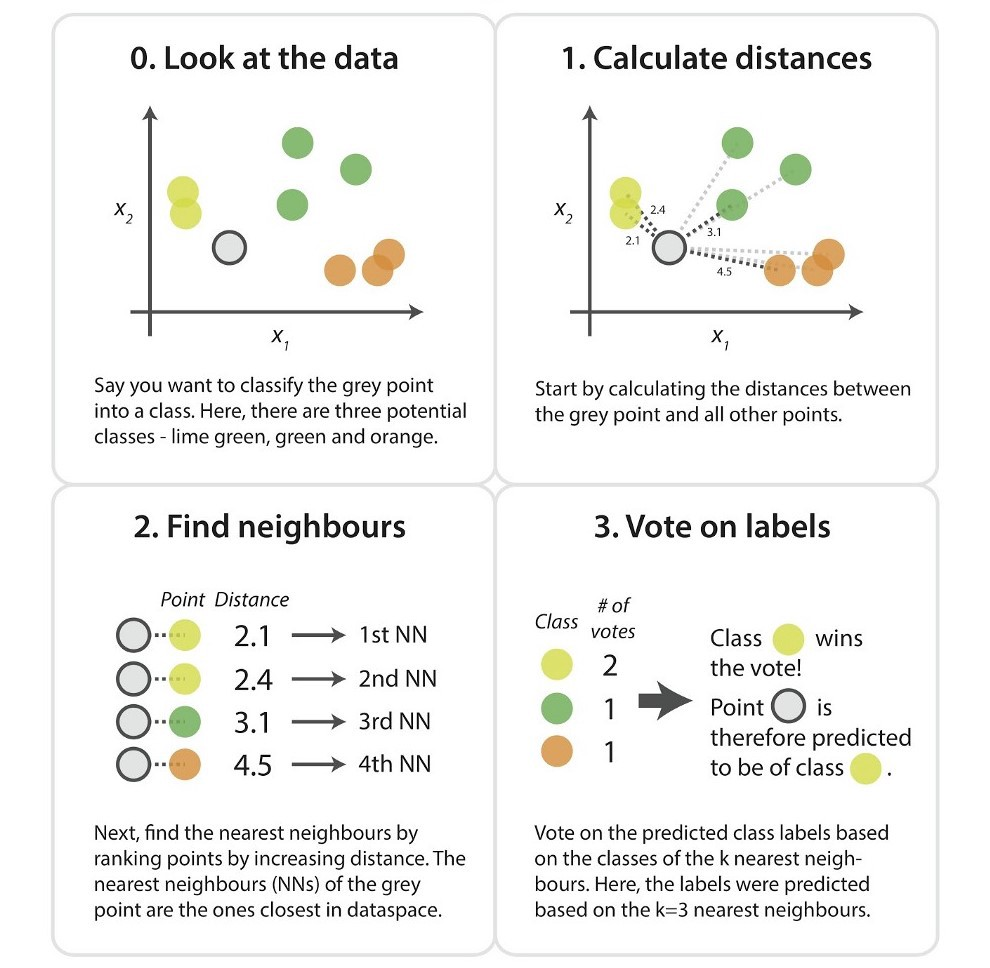

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
# Load the data
url = "https://raw.githubusercontent.com/carlosfalco/datapacks21-22/main/winequality.csv"
wine_df = pd.read_csv(url)

wine_df.head()

,Fixed acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


Let's standardize all our variables to begin preparing the data for our model

In [3]:
# Standardizing all variables other than Quality
quality_df = wine_df.filter(["Quality"], axis=1)
wine_df.drop(wine_df.columns[11], axis=1, inplace=True)

X = wine_df
y = quality_df

standard = StandardScaler()
standard.fit(X)
X = pd.DataFrame(standard.transform(X), columns=X.columns)

In [4]:
# Partitioning the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=2020, stratify=y_train)

In [5]:
#KNN classification model to predict Quality based on all the remaining numeric variables
neighbors = np.arange(1, 31)
trainA_accuracy = np.empty(30)
trainB_accuracy = np.empty(30)

# Iterating on K ranging from 1 to 30.
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train.values.ravel())
    trainA_accuracy[k-1] = knn.score(X_train, y_train)
    trainB_accuracy[k-1] = knn.score(X_val, y_val)

Let's visualize the accuracy of our two train datasets to see which value of k will be suitable to plot our confusion matrix

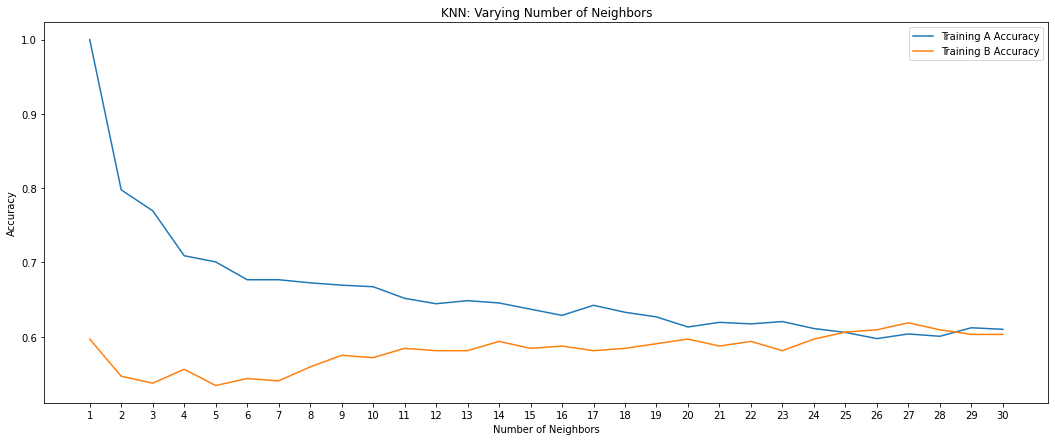

In [7]:
# Plotting the accuracy for the train A and train B datasets
plt.figure(figsize=(18,7))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, trainA_accuracy, label="Training A Accuracy")
plt.plot(neighbors, trainB_accuracy, label="Training B Accuracy")
plt.legend()
plt.xticks(neighbors)
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

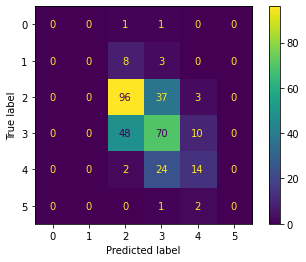

The accuracy score for the model is  0.5625


In [51]:
# Plotting confusion matrix of the actual vs predicted wine quality
k = 20
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)
cf = metrics.confusion_matrix(y_test, y_pred)
cfd = ConfusionMatrixDisplay(confusion_matrix=cf)
cfd.plot()
plt.show()

print("The accuracy score for the model is ", accuracy_score(y_test, y_pred))

An accuracy of 0.5625 isn't great. But at least the predicted scores aren't too far off. It seems the algorithm struggles with assigning the highest scores (5).

Why? (FOLLOW UP)